# Wine Data Analysis
## QMIND - TD Team

In [2]:
#import data manipulation packages
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
import math
from matplotlib.backends.backend_pdf import PdfPages
wine_data = pd.read_csv('wine_quality_data.csv')#imports wine quality data csv

Single Variable Analysis:


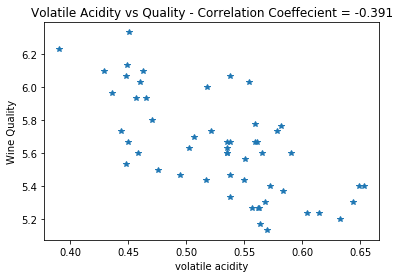

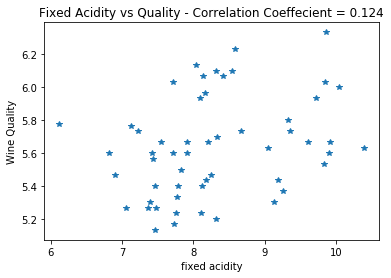

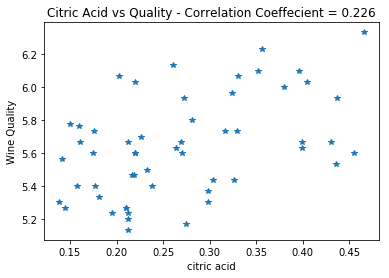

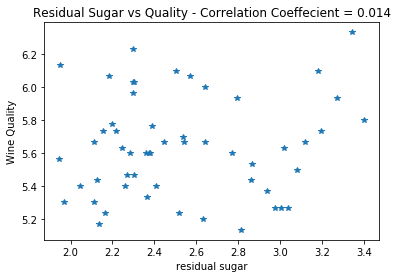

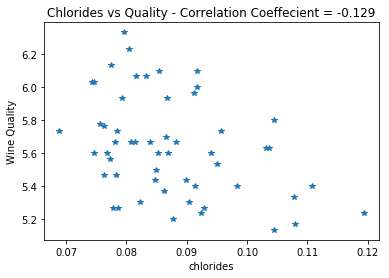

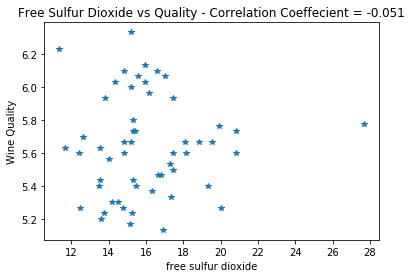

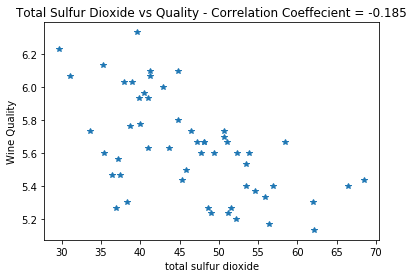

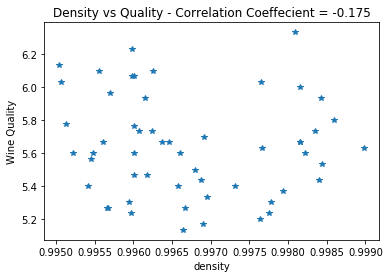

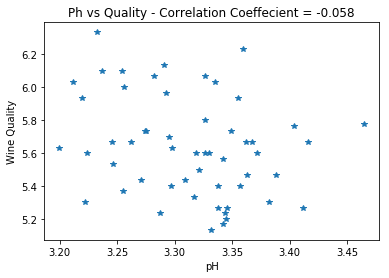

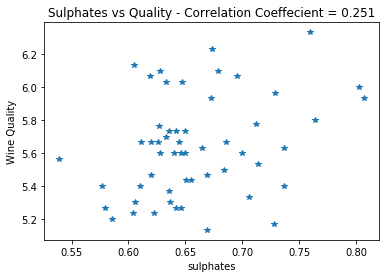

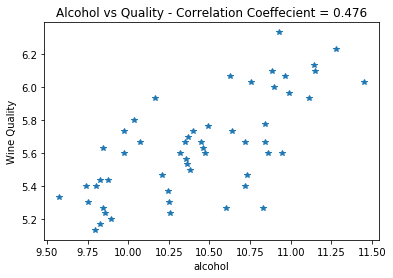

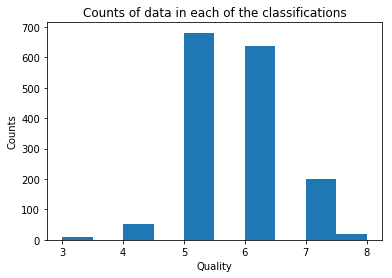

In [4]:
pp = PdfPages('wine_data_analysis.pdf')

def avg_points(data_points, num_in_avg):
    #takes in a set of data - data_points
    #and the number of points that should be merged into each avg point - num_in_avg
    #returns a list with all of the averaged points
    
    avged_data = []
    #will go through all datapoints. last datapoint may be an avg of < num_in_avg
    num_avged_pts = math.ceil(len(data_points)/num_in_avg)#determines how many times to loop
    
    for i in range(num_avged_pts):#loops through and gets a set of avg points
        avged_data.append( np.mean(data_points[num_in_avg*i : min(len(data_points),num_in_avg*(i+1))] ))
    return avged_data


num_pts_in_avg = 30#Important constat: Determines how much to avg the data

headers = wine_data.columns.values#gets all of the types of data from the headers of the dataframe
print("Single Variable Analysis:")
avged_quality = avg_points(wine_data["quality"], num_pts_in_avg)#gets an averaged dataset of the wine quality

fig = plt.figure()
for i in range(len(headers)-1):
    avged_categ_data = avg_points(wine_data[headers[i]], num_pts_in_avg)#gets the averaged dataset of the other category
    correlation_coeff = np.corrcoef(wine_data[headers[i]],wine_data["quality"])[0][1]#gets the correlation between the data                        
    #plotting the data
    plt.figure(i)#plots out the averaged data
    plt.title(headers[i].title()+" vs Quality - Correlation Coeffecient = " + str(round(correlation_coeff,3)))
    plt.xlabel(headers[i])
    plt.ylabel("Wine Quality")
    plt.plot(avged_categ_data, avged_quality, '*')
    plt.savefig(pp, format='pdf')#appends the figure to the pdf
    
plt.figure(len(headers))
plt.title("Counts of data in each of the classifications")
plt.xlabel("Quality")
plt.ylabel("Counts")
plt.hist(wine_data['quality'])
plt.savefig(pp, format='pdf')#appends the figure to the pdf
    
pp.close()#closes the pdf and saves it

Multi-Variable Analysis


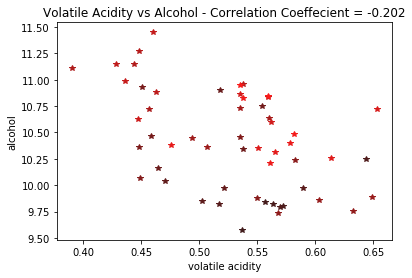

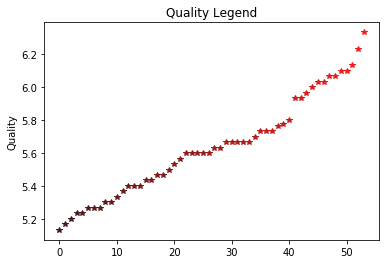

In [123]:
def order_data(cat1,cat2,quality):
    q = quality.copy()
    c1 = [cat1 for _,cat1 in sorted(zip(q,cat1))]
    c2 = [cat2 for _,cat2 in sorted(zip(q,cat2))]
    q = sorted(q)
    return c1,c2,q

print ("Multi-Variable Analysis")

category1 = "volatile acidity"
category2 = "alcohol"

fig = plt.figure()

avg_cat1_data = avg_points(wine_data[category1], num_pts_in_avg)#gets the averaged dataset of the other category
avg_cat2_data = avg_points(wine_data[category2], num_pts_in_avg)#gets the averaged dataset of the other category
avg_cat1_dat, avg_cat2_data, avged_quality = order_data(avg_cat1_data, avg_cat2_data, avged_quality)

correlation_coeff = np.corrcoef(wine_data[category1],wine_data[category2])[0][1]#gets the correlation between the data                        

#plotting the data
plt.figure(1)#plots out the averaged data
plt.title(category1.title()+" vs "+ category2.title() + " - Correlation Coeffecient = " + str(round(correlation_coeff,3)))
plt.xlabel(category1)
plt.ylabel(category2)

color_incrament = 0.75/len(avg_cat1_data)
for i in range(len(avg_cat1_data)): 
    plt.plot(avg_cat1_data[i], avg_cat2_data[i], '*', color=(color_incrament*i+0.25,0.1,0.1))
pp2 = PdfPages(category1.title() +" - " +category2.title() + " multivar analysis.pdf")
plt.savefig(pp2, format='pdf')#appends the figure to the pdf

plt.figure(2)
plt.title("Quality Legend")
plt.ylabel("Quality")
for i in range(len(avg_cat1_data)): 
    plt.plot(i, avged_quality[i], '*', color=(color_incrament*i+0.25,0.1,0.1))
plt.savefig(pp2, format='pdf')
    

pp2.close()#closes the pdf and saves it


In [78]:
#testing code
a = [3,4,2]
b = [5, 4,3]
c = [6,7,3]
a1,b1,c1 = order_data(a,b,c)
print(a1)
print(b1)
print(c1)
print()
print(a,b,c)

[2, 3, 4]
[3, 5, 4]
[3, 6, 7]

[3, 4, 2] [5, 4, 3] [6, 7, 3]


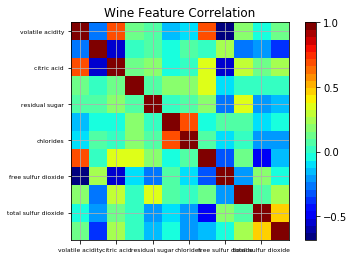

In [134]:
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Wine Feature Correlation')
    labels=headers
    ax1.set_xticklabels(labels,fontsize=6)
    ax1.set_yticklabels(labels,fontsize=6)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[-1,-.5,0,.5,1])
    plt.show()
correlation_matrix(wine_data)